# Smartphone EDA Case Study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("5. smartphones.csv")
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


# Data Cleaning

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [7]:
df.isnull().sum()/df.shape[0]*100

brand_name                    0.000000
model                         0.000000
price                         0.000000
avg_rating                   10.306122
5G_or_not                     0.000000
processor_brand               2.040816
num_cores                     0.612245
processor_speed               4.285714
battery_capacity              1.122449
fast_charging_available       0.000000
fast_charging                21.530612
ram_capacity                  0.000000
internal_memory               0.000000
screen_size                   0.000000
refresh_rate                  0.000000
num_rear_cameras              0.000000
os                            1.428571
primary_camera_rear           0.000000
primary_camera_front          0.510204
extended_memory_available     0.000000
resolution_height             0.000000
resolution_width              0.000000
dtype: float64

In [8]:
numeric_cols = ["avg_rating", "processor_speed", "battery_capacity", "fast_charging", "primary_camera_front", "num_cores" ]
df[numeric_cols]= df[numeric_cols].fillna(df[numeric_cols].mean())

obj_cols= ["os", "processor_brand"]
df[obj_cols]= df[obj_cols].fillna(df[obj_cols].mode())

# EDA Questions

**1. Data Overview:**

In [11]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.000000,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.000000,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.000000,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,4817.748194,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,4817.748194,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [12]:
print("\nBasic statistics of numeric columns:")
df.describe()


Basic statistics of numeric columns:


,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.701060,0.496616,0.834276,0.454026,1003.852459,0.353205,30.360092,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.849132,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.500000,0.000000,8.000000,2.050000,4500.000000,1.000000,25.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,7.900000,1.000000,8.000000,2.400000,5000.000000,1.000000,45.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,65.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


**2. Brand Distribution:**

In [14]:
print("Top 5 brands by count:")
df["brand_name"].value_counts().head(5)

Top 5 brands by count:


brand_name
xiaomi     134
samsung    132
vivo       111
realme      97
oppo        88
Name: count, dtype: int64

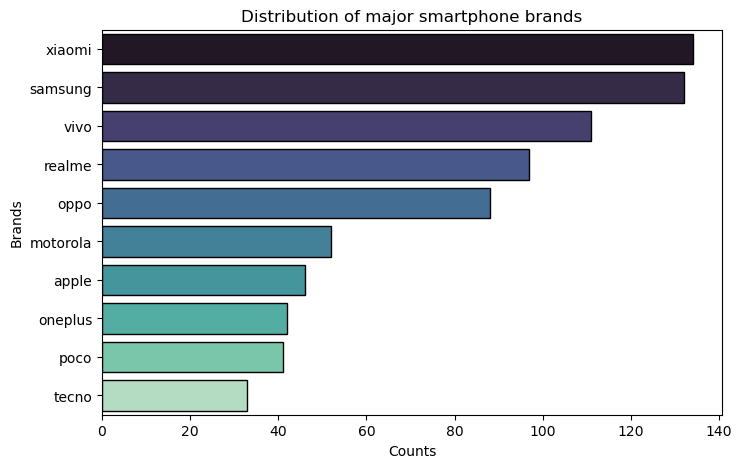

In [15]:
Dist_brand=df["brand_name"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=Dist_brand.values, y=Dist_brand.index, palette="mako", hue= Dist_brand.index, edgecolor="black")
plt.title("Distribution of major smartphone brands")
plt.xlabel("Counts")
plt.ylabel("Brands")
plt.show()

**3. Display Size Analysis:**

Average display size across all brands:


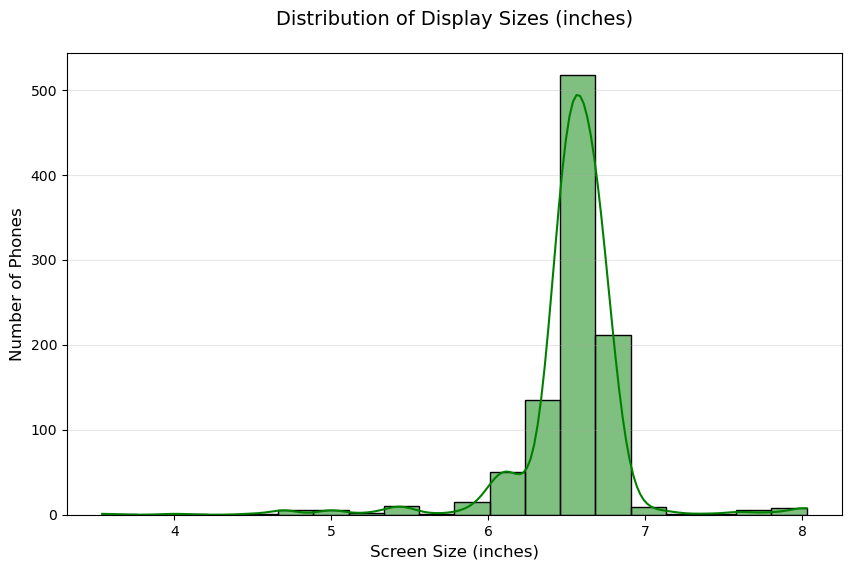

In [17]:
print("Average display size across all brands:")
plt.figure(figsize=(10,6))
sns.histplot(df["screen_size"], bins=20, color="green", kde=True, edgecolor="black")
plt.title("Distribution of Display Sizes (inches)", fontsize=14, pad=20)
plt.xlabel("Screen Size (inches)", fontsize=12)
plt.ylabel("Number of Phones", fontsize=12)
plt.grid(axis='y', alpha=0.3)

In [18]:
print("\nAverage display size by brand:")
ss_brand= df.groupby("brand_name")["screen_size"].mean().sort_values(ascending= False).head(10)
print(ss_brand)


Average display size by brand:
brand_name
royole     7.500000
zte        6.850000
lg         6.800000
blu        6.800000
nubia      6.756667
huawei     6.745000
tesla      6.730000
infinix    6.718966
lenovo     6.710000
tecno      6.705455
Name: screen_size, dtype: float64


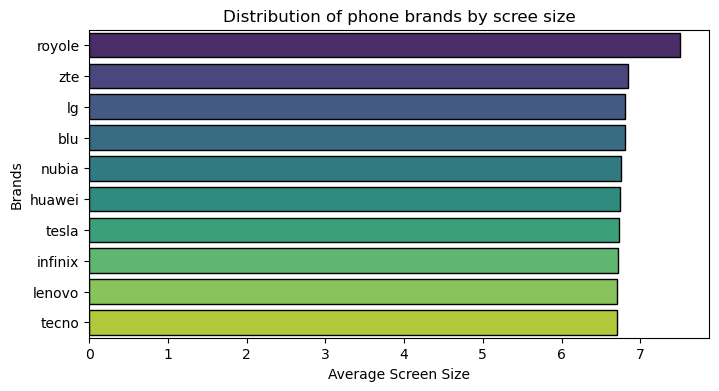

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(x=ss_brand.values, y=ss_brand.index, palette="viridis", hue= ss_brand.index, edgecolor="black")
plt.title("Distribution of phone brands by scree size")
plt.xlabel("Average Screen Size")
plt.ylabel("Brands")
plt.show()

**4. Camera Quality:**

In [21]:
camera_stats = df.groupby('brand_name')[['primary_camera_rear', 'primary_camera_front']].mean()
top10_rear = camera_stats['primary_camera_rear'].head(10).sort_values(ascending=False)
top10_front = camera_stats['primary_camera_front'].head(10).sort_values(ascending=False)

Relationship between camera resolution (front and back) by the brand


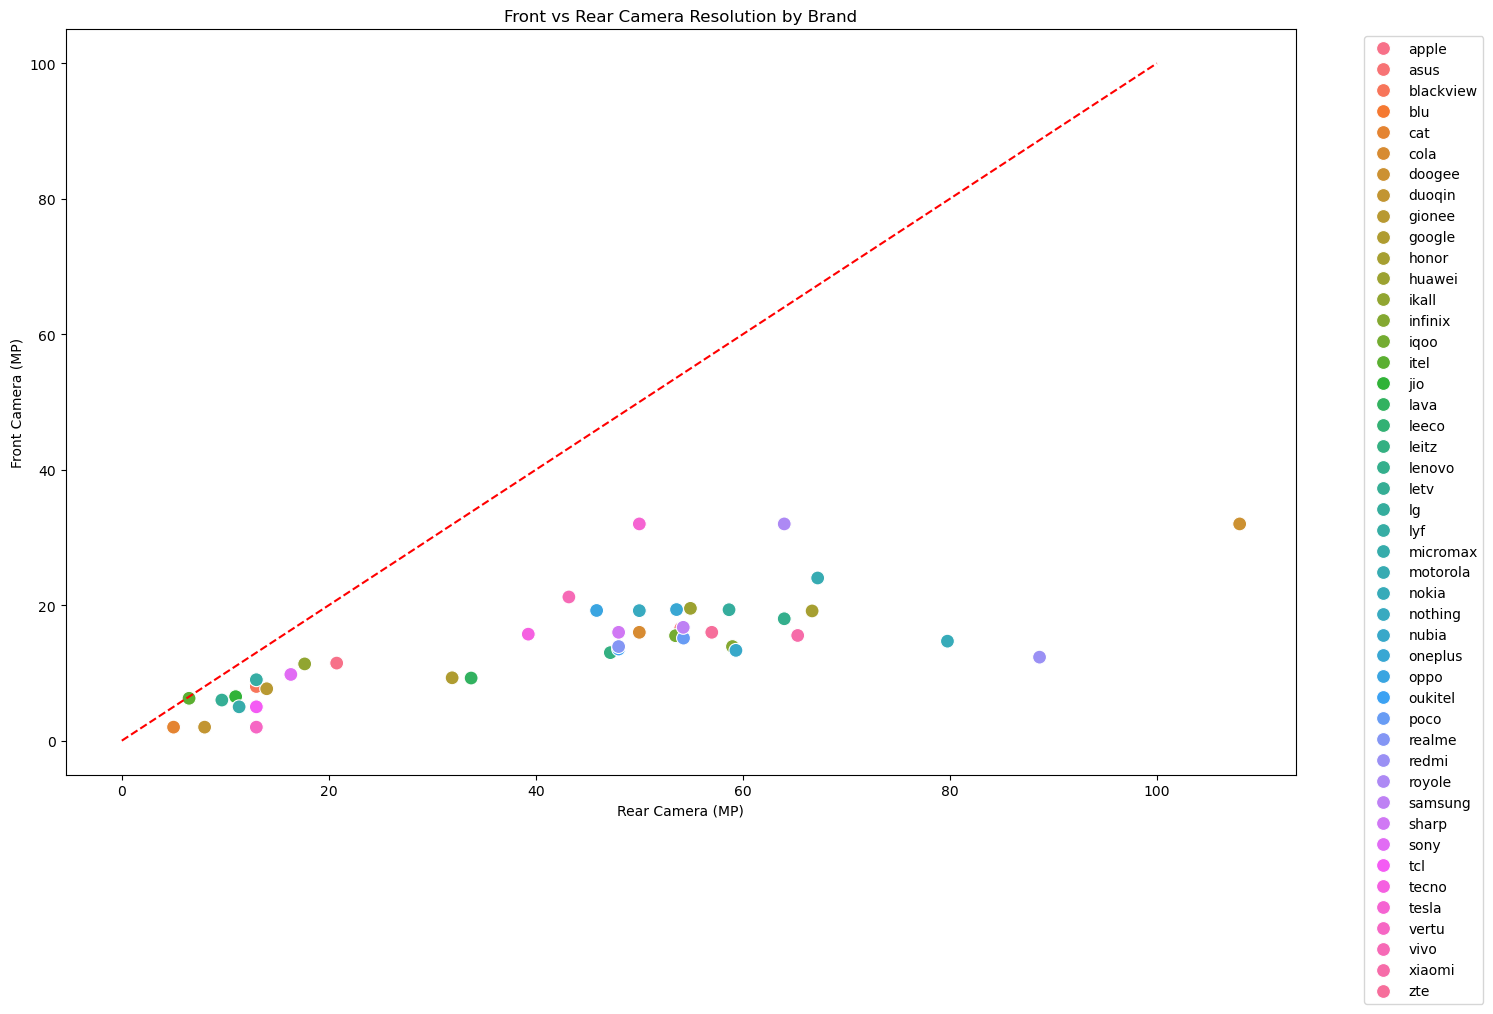

In [22]:
print("Relationship between camera resolution (front and back) by the brand")
plt.figure(figsize=(15, 10))
sns.scatterplot(data=camera_stats, 
                x='primary_camera_rear', 
                y='primary_camera_front',
                hue=camera_stats.index,
                s=100)
plt.plot([0, 100], [0, 100], 'r--')  # Reference line
plt.title('Front vs Rear Camera Resolution by Brand')
plt.xlabel('Rear Camera (MP)')
plt.ylabel('Front Camera (MP)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
top_rear = camera_stats['primary_camera_rear'].idxmax()
top_front = camera_stats['primary_camera_front'].idxmax()
print("The top front camera resolution brand is",top_front)
print("The top rear camera resolution brand is",top_rear)

The top front camera resolution brand is doogee
The top rear camera resolution brand is doogee


**5. .Battery Capacity vs. Price:**

In [25]:
brand_stats = df.groupby('brand_name')[['battery_capacity', 'price']].mean()

top_brands = brand_stats.sort_values('price', ascending=False).head(20)

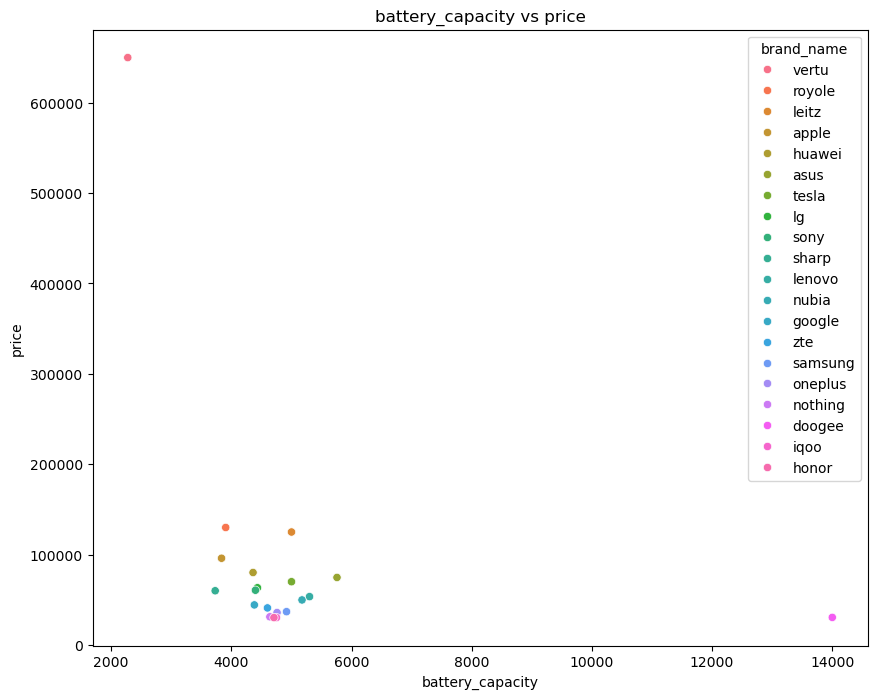

In [26]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data= top_brands, 
                x='battery_capacity', 
                y='price',
                hue= top_brands.index)
plt.title('battery_capacity vs price')
plt.xlabel('battery_capacity')
plt.ylabel('price')
plt.show()

In [27]:
battery_year_corr= df['battery_capacity'].corr(df['price'])
print("Correlation between battery capacity and Price:", battery_year_corr)

Correlation between battery capacity and Price: -0.1575319341589155


**6. Memory and Storage Analysis:**

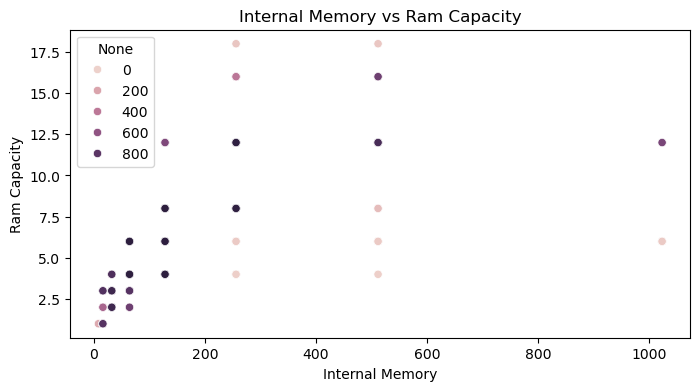

In [29]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, 
                x='internal_memory', 
                y='ram_capacity',
                hue=df.index)
plt.title('Internal Memory vs Ram Capacity')
plt.xlabel('Internal Memory')
plt.ylabel('Ram Capacity')
plt.show()

In [30]:
is_stats= df.groupby('brand_name')[['internal_memory', 'ram_capacity']].mean()
top_10_im= is_stats["internal_memory"].head(10).sort_values(ascending=False)
top_10_rc= is_stats["ram_capacity"].head(10).sort_values(ascending=False)

In [31]:
print("Average internal storage by brand:")
print(top_10_im)

print("\nAverage RAM by brand:")
print(top_10_rc)

Average internal storage by brand:
brand_name
asus         292.571429
apple        263.652174
doogee       192.000000
google       137.142857
blu          128.000000
blackview     64.000000
cola          64.000000
duoqin        64.000000
gionee        64.000000
cat           16.000000
Name: internal_memory, dtype: float64

Average RAM by brand:
brand_name
asus         13.714286
doogee       10.000000
blu           8.000000
google        8.000000
apple         5.282609
gionee        4.333333
blackview     4.000000
cola          4.000000
duoqin        4.000000
cat           2.000000
Name: ram_capacity, dtype: float64


**7. Price Distribution:**

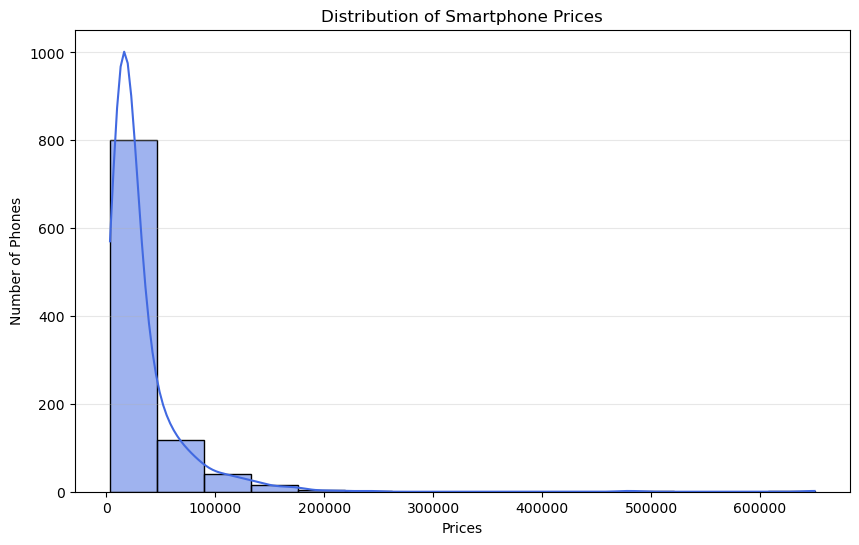

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df["price"], bins=15, color="royalblue", kde=True, edgecolor="black")
plt.title("Distribution of Smartphone Prices")
plt.xlabel("Prices")
plt.ylabel("Number of Phones")
plt.grid(axis='y', alpha=0.3)

Average price by brand:


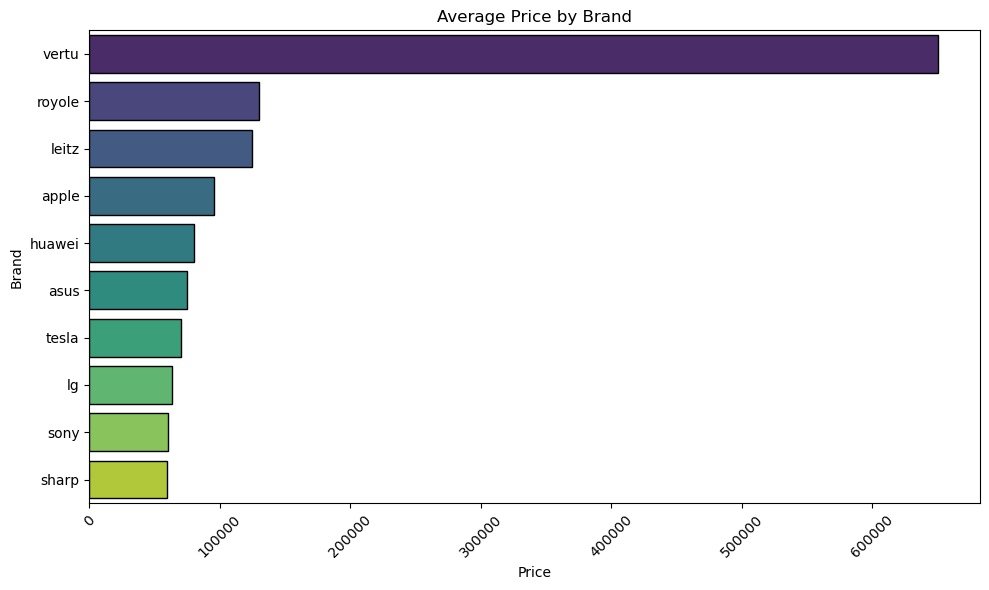

In [34]:
print("Average price by brand:")
avg_price= df.groupby("brand_name")["price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_price.values, 
                y=avg_price.index, palette="viridis",hue=avg_price.index, edgecolor="black")
plt.title("Average Price by Brand")
plt.xlabel("Price")
plt.ylabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**8. Camera vs. Price:**

In [36]:
camera_p_stats = df.groupby('price')[['primary_camera_rear', 'primary_camera_front']].mean()

cor= df['primary_camera_front'].corr(df['price'])
cor1= df['primary_camera_rear'].corr(df['price'])


print("Correlation between back camera resolution and price:")
print(cor1)

print("\nCorrelation between front camera resolution and price:")
print(cor)

Correlation between back camera resolution and price:
0.09209547872578562

Correlation between front camera resolution and price:
0.16026173422016018


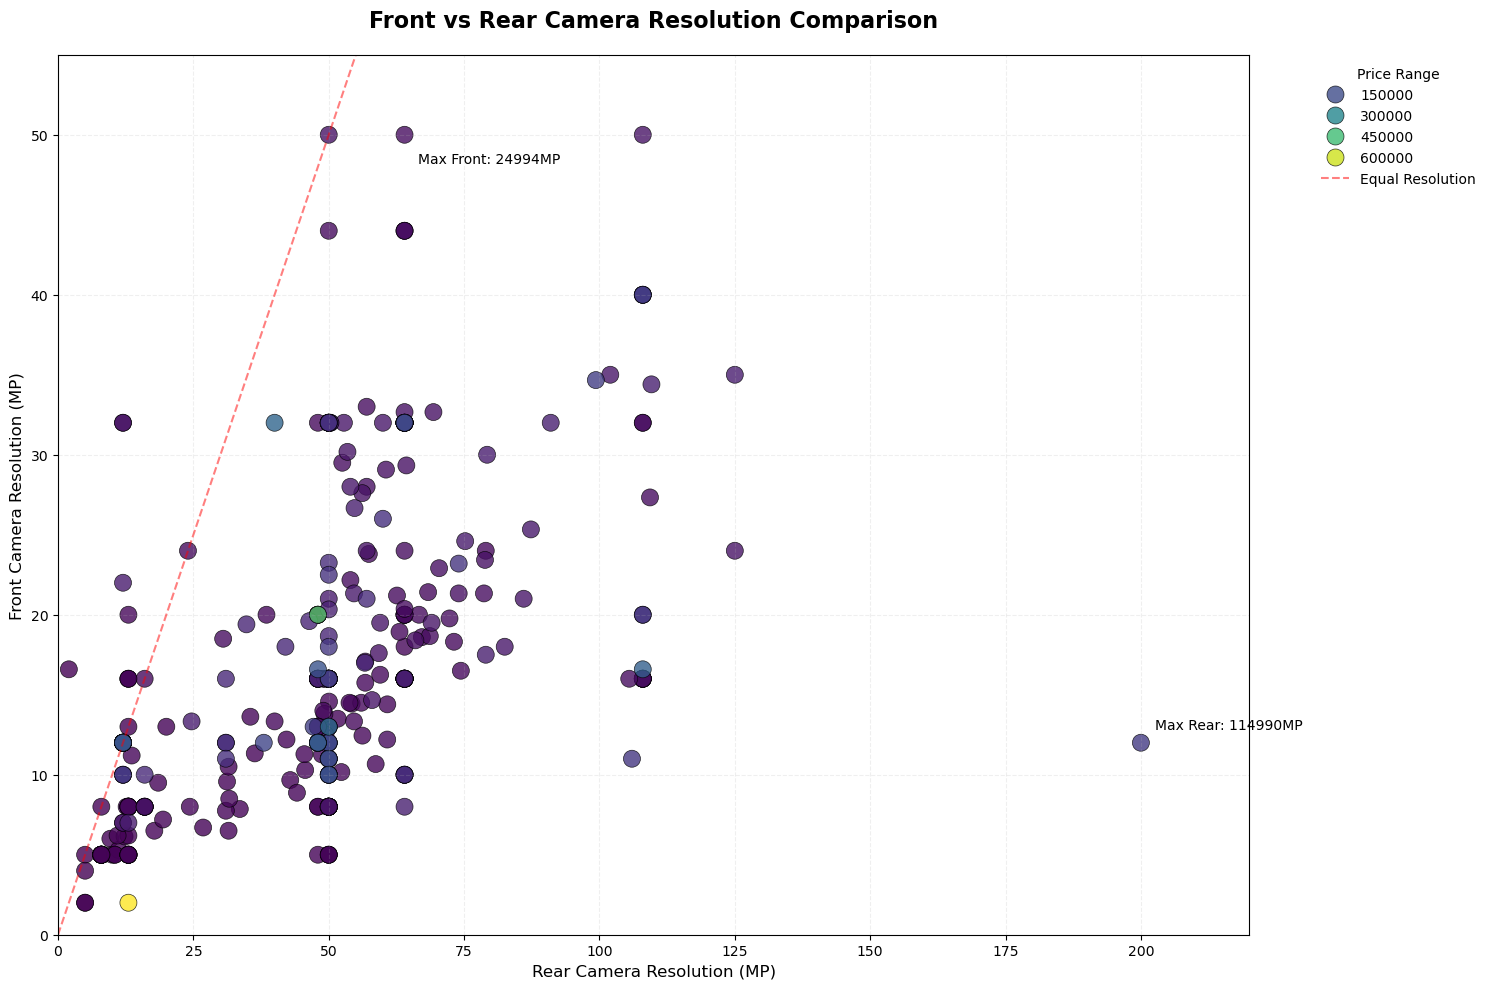

In [37]:
plt.figure(figsize=(15, 10))

# Create the scatter plot with better styling
scatter = sns.scatterplot(
    data=camera_p_stats,
    x='primary_camera_rear',
    y='primary_camera_front',
    hue=camera_p_stats.index,
    palette='viridis',  # Better color palette
    s=150,             # Larger points
    alpha=0.8,         # Slight transparency
    edgecolor='black', # Clear point boundaries
    linewidth=0.5
)

# Add reference line (y=x)
plt.plot([0, 100], [0, 100], 'r--', alpha=0.5, label='Equal Resolution')

# Add labels and title
plt.title('Front vs Rear Camera Resolution Comparison', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Rear Camera Resolution (MP)', fontsize=12)
plt.ylabel('Front Camera Resolution (MP)', fontsize=12)

# Improve legend
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title='Price Range',
    frameon=False,
    fontsize=10
)

# Add grid for better readability
plt.grid(alpha=0.2, linestyle='--')

# Set equal axis limits for proper comparison
plt.xlim(0, camera_p_stats['primary_camera_rear'].max()*1.1)
plt.ylim(0, camera_p_stats['primary_camera_front'].max()*1.1)

# Add annotations for interesting points
if len(camera_p_stats) > 0:
    max_rear = camera_p_stats['primary_camera_rear'].idxmax()
    max_front = camera_p_stats['primary_camera_front'].idxmax()
    
    plt.annotate(f'Max Rear: {max_rear}MP',
                xy=(camera_p_stats['primary_camera_rear'].max(), 
                    camera_p_stats.loc[camera_p_stats['primary_camera_rear'].idxmax(), 'primary_camera_front']),
                xytext=(10, 10), textcoords='offset points')
    
    plt.annotate(f'Max Front: {max_front}MP',
                xy=(camera_p_stats.loc[camera_p_stats['primary_camera_front'].idxmax(), 'primary_camera_rear'],
                    camera_p_stats['primary_camera_front'].max()),
                xytext=(10, -20), textcoords='offset points')

plt.tight_layout()
plt.show()

**9. Battery Efficiency:**

In [39]:
print("Brand with highest battery efficiency:")
df["battery_efficiency"] = df["battery_capacity"] / df["price"]
battery_efficiency= df.groupby("brand_name")[["battery_efficiency"]].mean().sort_values(by="battery_efficiency",ascending=False).head(10)
print(battery_efficiency)

Brand with highest battery efficiency:
            battery_efficiency
brand_name                    
lyf                   0.759933
micromax              0.729903
itel                  0.676404
ikall                 0.659280
letv                  0.655231
gionee                0.594882
blackview             0.576196
jio                   0.548070
oukitel               0.478466
tecno                 0.468284


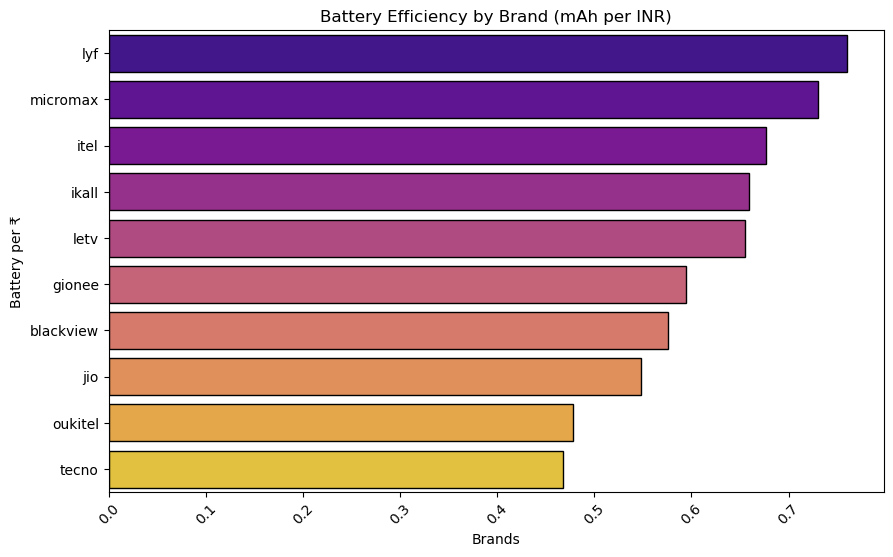

In [40]:
plt.figure(figsize=(10,6))
values = battery_efficiency.values.flatten()  
index = battery_efficiency.index
sns.barplot(x=values, y=index, palette="plasma",
                 edgecolor="black", hue=index,
                 linewidth=1)
plt.title("Battery Efficiency by Brand (mAh per INR)")
plt.xlabel("Brands")
plt.ylabel("Battery per ₹")
plt.xticks(rotation=45)
plt.show()